In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV,train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler 

import json, pickle

In [2]:
df_original = pd.read_csv("Iris.csv")

In [3]:
df = df_original.drop("Id",axis = 1).copy()
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
label_encoded_data = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
df.Species = df.Species.replace(label_encoded_data)

In [6]:
df.Species.unique()

array([0, 1, 2], dtype=int64)

In [7]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
x,y = df.drop("Species", axis = 1), df.Species

In [9]:
x.head(20)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [10]:
x.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
for col in x.columns:
    mean = x[col].mean()
    std = x[col].std()
    

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Density'>

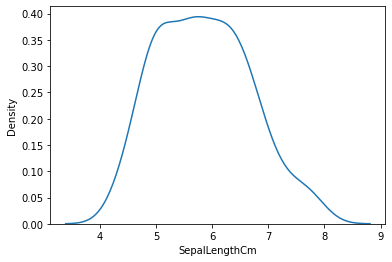

In [12]:
sns.kdeplot(x["SepalLengthCm"])

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Density'>

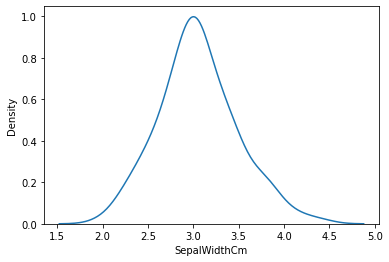

In [13]:
sns.kdeplot(x["SepalWidthCm"])

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Density'>

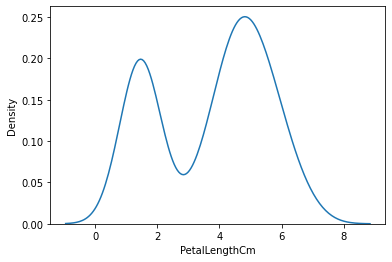

In [14]:
sns.kdeplot(x["PetalLengthCm"])

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Density'>

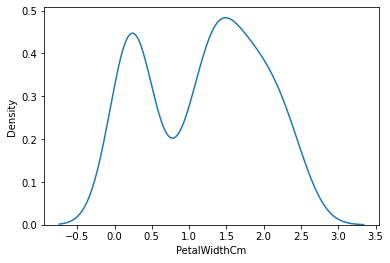

In [15]:
sns.kdeplot(x["PetalWidthCm"])

In [16]:
from scipy.stats import zscore

def outliers(df_,col):
    z_score = abs(zscore(df_[col]))
    index = np.where(z_score>3)
    if len(index[0])>0:
        print(f"Outliers in column '{col}' at indexes {index[0]}")
    else:
        print(f"No Outliers in column '{col}'")
    
    
for col in x.columns:
    outliers(x,col)

No Outliers in column 'SepalLengthCm'
Outliers in column 'SepalWidthCm' at indexes [15]
No Outliers in column 'PetalLengthCm'
No Outliers in column 'PetalWidthCm'


In [17]:
x.SepalWidthCm[15]

4.4

In [18]:
x["SepalWidthCm"].describe()

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidthCm, dtype: float64

### This is the maximum value in 'SepalWidthCm' column, replacing it with second maximum value of same column.

In [19]:
SecondLargestValue = x.SepalWidthCm.sort_values(ascending=False).tolist()[1]
x.SepalWidthCm[15] = SecondLargestValue
x.SepalWidthCm[15]

4.2

In [20]:
# Again checking for outliers:

for col in x.columns:
    outliers(x,col)

No Outliers in column 'SepalLengthCm'
No Outliers in column 'SepalWidthCm'
No Outliers in column 'PetalLengthCm'
No Outliers in column 'PetalWidthCm'


In [21]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

# Split data

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=64, stratify=y)

# Model Builting:

In [23]:
KNN_clf1 = KNeighborsClassifier()
KNN_clf1.fit(x_train,y_train)

KNeighborsClassifier()

# Prediction

In [24]:
y_pred_train = KNN_clf1.predict(x_train)
y_pred_test = KNN_clf1.predict(x_test)

y_train[:8]

24     0
28     0
78     1
18     0
129    2
135    2
102    2
119    2
Name: Species, dtype: int64

In [25]:
y_pred_train[:8]

array([0, 0, 1, 0, 2, 2, 2, 2], dtype=int64)

# Model Evaluation

In [26]:
accuracy_score(y_train,y_pred_train)

0.9821428571428571

In [27]:
accuracy_score(y_test,y_pred_test)

0.9736842105263158

# Hyper Parameter Tuning:

In [28]:
KNN_clf = KNeighborsClassifier()

hyperparam = {"n_neighbors":range(2,40),"p":[0,1]}
gscv_KNN = GridSearchCV(KNN_clf,hyperparam,cv=5)
gscv_KNN.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 40), 'p': [0, 1]})

In [29]:
gscv_KNN.best_estimator_

KNeighborsClassifier(n_neighbors=8, p=1)

In [30]:
KNN_clf2=gscv_KNN.best_estimator_

### Prediction on test and train data:

In [31]:
y_pred_train = KNN_clf2.predict(x_train)
y_pred_test = KNN_clf2.predict(x_test)

### Model Evaluation

In [32]:
accuracy_score(y_train,y_pred_train)

0.9732142857142857

In [33]:
accuracy_score(y_test,y_pred_test)

0.9473684210526315

### Project data:

In [34]:

project_data = {"features":list(x.columns),
                "label_encoded_data": label_encoded_data}
project_data

{'features': ['SepalLengthCm',
  'SepalWidthCm',
  'PetalLengthCm',
  'PetalWidthCm'],
 'label_encoded_data': {'Iris-setosa': 0,
  'Iris-versicolor': 1,
  'Iris-virginica': 2}}

# Data Normalization:

In [35]:
x_original = x.copy()
x 
x = x_original.copy()
norm_scale = MinMaxScaler()
x = pd.DataFrame(norm_scale.fit_transform(x),columns=x.columns)
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.681818,0.067797,0.041667
1,0.166667,0.454545,0.067797,0.041667
2,0.111111,0.545455,0.050847,0.041667
3,0.083333,0.500000,0.084746,0.041667
4,0.194444,0.727273,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.454545,0.711864,0.916667
146,0.555556,0.227273,0.677966,0.750000
147,0.611111,0.454545,0.711864,0.791667
148,0.527778,0.636364,0.745763,0.916667


In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=64, stratify=y)
KNN_clf3 = KNeighborsClassifier()
KNN_clf3.fit(x_train,y_train)

y_pred_train = KNN_clf3.predict(x_train)
y_pred_test = KNN_clf3.predict(x_test)

accuracy_score(y_train,y_pred_train)

0.9732142857142857

In [37]:
accuracy_score(y_test,y_pred_test)

0.9736842105263158

## Hyper Param Tuning

In [38]:
KNN_clf = KNeighborsClassifier()

hyperparam = {"n_neighbors":range(2,40),"p":[0,1]}
gscv_KNN = GridSearchCV(KNN_clf,hyperparam,cv=5)
gscv_KNN.fit(x_train,y_train)
KNN_clf4 = gscv_KNN.best_estimator_

y_pred_train = KNN_clf4.predict(x_train)
y_pred_test = KNN_clf4.predict(x_test)
accuracy_score(y_train,y_pred_train)

0.9642857142857143

In [39]:
accuracy_score(y_test,y_pred_test)

0.9473684210526315



# Data Standarization:

In [40]:
x = x_original.copy()
norm_scale = StandardScaler()
x = pd.DataFrame(norm_scale.fit_transform(x),columns=x.columns)
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.044481,-1.341272,-1.312977
1,-1.143017,-0.122972,-1.341272,-1.312977
2,-1.385353,0.344009,-1.398138,-1.312977
3,-1.506521,0.110519,-1.284407,-1.312977
4,-1.021849,1.277972,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.122972,0.819624,1.447956
146,0.553333,-1.290424,0.705893,0.922064
147,0.795669,-0.122972,0.819624,1.053537
148,0.432165,0.810990,0.933356,1.447956


In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=64, stratify=y)

KNN_clf5 = KNeighborsClassifier()
KNN_clf5.fit(x_train,y_train)

y_pred_train = KNN_clf5.predict(x_train)
y_pred_test = KNN_clf5.predict(x_test)

accuracy_score(y_train,y_pred_train)

0.9732142857142857

In [42]:
accuracy_score(y_test,y_pred_test)

0.9473684210526315

In [43]:
KNN_clf = KNeighborsClassifier()

hyperparam = {"n_neighbors":range(2,40),"p":[0,1]}
gscv_KNN = GridSearchCV(KNN_clf,hyperparam,cv=5)
gscv_KNN.fit(x_train,y_train)
KNN_clf6 = gscv_KNN.best_estimator_

y_pred_train = KNN_clf6.predict(x_train)
y_pred_test = KNN_clf6.predict(x_test)
accuracy_score(y_train,y_pred_train)

0.9732142857142857

In [44]:
accuracy_score(y_test,y_pred_test)

0.9736842105263158

# Best Model

### KNN_clf is selected as best model which have:
   - Remove Outlier
   - No data scaling
   - No hyper parameter tuning
   

# Dump Model And Project data:

In [45]:
with open("model.pkl","wb") as f:
    pickle.dump(KNN_clf1,f)

with open("project_data.json","w") as f:
    json.dump(project_data,f)